# 01 | EDA & Feature Engineering
Credit Card Fraud Detection

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet("data/engineered_transactions.parquet", engine="fastparquet")

print(df.shape)
df.head()

(1000, 17)


,transaction_id,customer_id,amount,transaction_time,time_since_last_txn,is_fraud,amount_norm,merchant_category_electronics,merchant_category_grocery,merchant_category_restaurants,merchant_category_travel,device_mobile,device_tablet,location_FL,location_IL,location_NY,location_TX
0,666,1,28.430000,2025-01-07 15:24:41,0.0,0,0.492564,False,False,False,True,False,True,False,False,False,True
1,186,1,10.200000,2025-01-09 02:31:10,126389.0,0,0.176720,False,False,False,True,True,False,False,True,False,False
2,908,1,27.580000,2025-02-03 17:14:53,2213023.0,0,0.477838,False,False,False,True,False,True,False,True,False,False
3,281,1,34.400002,2025-03-06 04:41:50,2633217.0,0,0.595998,False,False,False,False,True,False,False,True,False,False
4,816,1,105.139999,2025-03-14 16:48:48,734818.0,0,1.821605,False,False,True,False,False,False,False,True,False,False


In [13]:
assert "is_fraud" in df.columns, "❌ is_fraud column missing!"
print("✅ is_fraud column found")
print(df["is_fraud"].value_counts())

✅ is_fraud column found
is_fraud
0    984
1     16
Name: count, dtype: int64


Fraud ratio: 0.0160


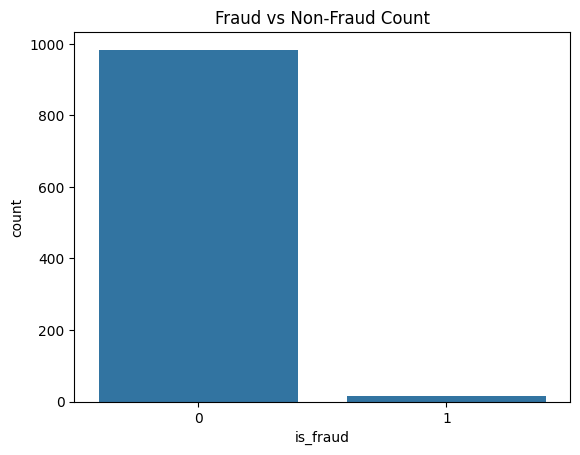

In [14]:
fraud_ratio = df["is_fraud"].mean()
print(f"Fraud ratio: {fraud_ratio:.4f}")

sns.countplot(x="is_fraud", data=df)
plt.title("Fraud vs Non-Fraud Count")
plt.show()

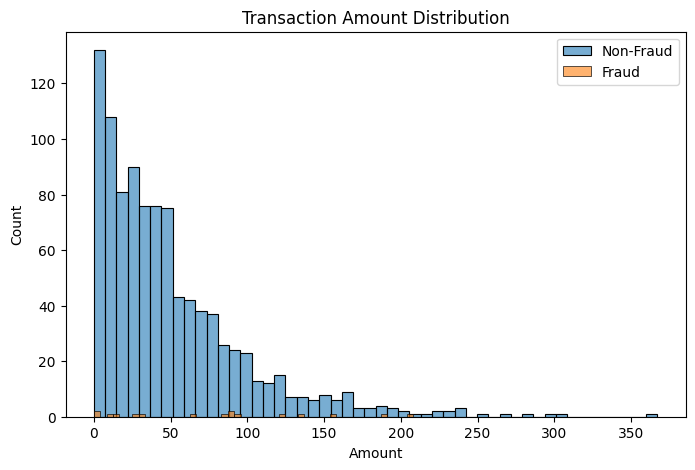

In [15]:
plt.figure(figsize=(8,5))

sns.histplot(
    df.loc[df["is_fraud"] == 0, "amount"],
    bins=50,
    label="Non-Fraud",
    alpha=0.6
)

sns.histplot(
    df.loc[df["is_fraud"] == 1, "amount"],
    bins=50,
    label="Fraud",
    alpha=0.6
)

plt.legend()
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.show()

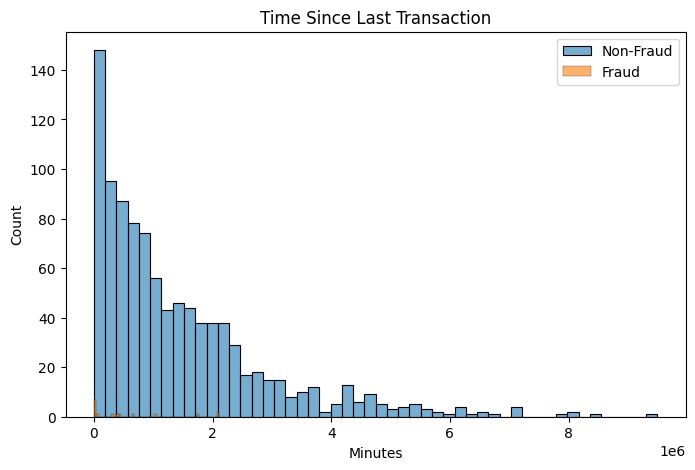

In [16]:
plt.figure(figsize=(8,5))

sns.histplot(
    df.loc[df["is_fraud"] == 0, "time_since_last_txn"],
    bins=50,
    label="Non-Fraud",
    alpha=0.6
)

sns.histplot(
    df.loc[df["is_fraud"] == 1, "time_since_last_txn"],
    bins=50,
    label="Fraud",
    alpha=0.6
)

plt.legend()
plt.title("Time Since Last Transaction")
plt.xlabel("Minutes")
plt.show()

In [17]:
corr = (
    df.corr(numeric_only=True)["is_fraud"]
    .sort_values(ascending=False)
)

corr.head(10)

is_fraud                         1.000000
amount_norm                      0.095777
amount                           0.083711
customer_id                      0.060980
merchant_category_grocery        0.057068
merchant_category_travel         0.038611
device_tablet                    0.026822
merchant_category_electronics    0.002153
location_FL                      0.000821
location_NY                     -0.002730
Name: is_fraud, dtype: float64

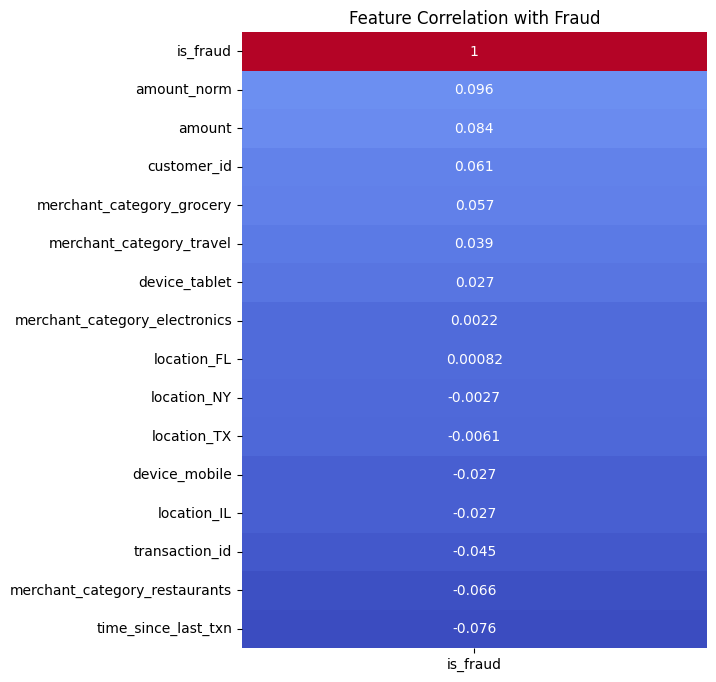

In [18]:
plt.figure(figsize=(6,8))
sns.heatmap(
    corr.to_frame(),
    annot=True,
    cmap="coolwarm",
    cbar=False
)
plt.title("Feature Correlation with Fraud")
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

df = pd.read_parquet("data/engineered_transactions.parquet")

In [20]:
X = df.drop(columns=[
    "is_fraud",
    "transaction_time"  # ❌ never feed raw timestamps
])

y = df["is_fraud"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [22]:
os.makedirs("data", exist_ok=True)

X_train.to_parquet("data/X_train.parquet", index=False)
X_test.to_parquet("data/X_test.parquet", index=False)

y_train.to_frame("is_fraud").to_parquet("data/y_train.parquet", index=False)
y_test.to_frame("is_fraud").to_parquet("data/y_test.parquet", index=False)

print("Train/test artifacts saved successfully")

Train/test artifacts saved successfully
